In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sys
import math

In [39]:
df = pd.read_csv('Flight_Data.csv')

In [40]:
Geographical_map = nx.Graph()

In [41]:
df2 = df.head(20)

In [42]:
df2

,Airline,SourceAirport,DestinationAirport,SourceAirport_City,SourceAirport_Country,SourceAirport_Latitude,SourceAirport_Longitude,SourceAirport_Altitude,DestinationAirport_City,DestinationAirport_Country,DestinationAirport_Latitude,DestinationAirport_Longitude,DestinationAirport_Altitude,Distance,FlyTime,Price
0,Pegasus Airlines,Sabiha Gökçen International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.898602,29.309200,312,Tehran,Iran,35.416100,51.152199,3305,1998.541333,2.982660,969.270667
1,Turkish Airlines,Sabiha Gökçen International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.898602,29.309200,312,Tehran,Iran,35.416100,51.152199,3305,1998.541333,2.982660,969.270667
2,Turkish Airlines,Atatürk International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.976898,28.814600,163,Tehran,Iran,35.416100,51.152199,3305,2040.978811,3.035377,990.489405
3,Emirates,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,Tehran,Iran,35.416100,51.152199,3305,1199.863567,1.990514,569.931784
4,Etihad Airways,Abu Dhabi International Airport,Imam Khomeini International Airport,Abu Dhabi,United Arab Emirates,24.433001,54.651100,88,Tehran,Iran,35.416100,51.152199,3305,1266.681453,2.073517,603.340726
5,Air Arabia,Sharjah International Airport,Imam Khomeini International Airport,Sharjah,United Arab Emirates,25.328600,55.517200,111,Tehran,Iran,35.416100,51.152199,3305,1196.902147,1.986835,568.451073
6,Qatar Airways,Hamad International Airport,Imam Khomeini International Airport,Doha,Qatar,25.273056,51.608056,13,Tehran,Iran,35.416100,51.152199,3305,1128.698504,1.902110,534.349252
7,Iran Air,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,Tehran,Iran,35.416100,51.152199,3305,1199.863567,1.990514,569.931784
8,Iran Air,Atatürk International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.976898,28.814600,163,Tehran,Iran,35.416100,51.152199,3305,2040.978811,3.035377,990.489405
9,Iran Air,Esenboğa International Airport,Imam Khomeini International Airport,Ankara,Turkey,40.128101,32.995098,3125,Tehran,Iran,35.416100,51.152199,3305,1676.121317,2.582138,808.060659


In [43]:
df2.max()

Airline                                            Turkish Airlines
SourceAirport                         Sharjah International Airport
DestinationAirport              Imam Khomeini International Airport
SourceAirport_City                                          Sharjah
SourceAirport_Country                                 United States
SourceAirport_Latitude                                      41.9786
SourceAirport_Longitude                                     55.5172
SourceAirport_Altitude                                         3125
DestinationAirport_City                                      Tehran
DestinationAirport_Country                                   Turkey
DestinationAirport_Latitude                               40.976898
DestinationAirport_Longitude                              51.152199
DestinationAirport_Altitude                                    3305
Distance                                               11034.235275
FlyTime                                         

In [44]:
df2.min()

Airline                                              Air Arabia
SourceAirport                   Abu Dhabi International Airport
DestinationAirport                Atatürk International Airport
SourceAirport_City                                    Abu Dhabi
SourceAirport_Country                                     Qatar
SourceAirport_Latitude                                24.433001
SourceAirport_Longitude                             -118.407997
SourceAirport_Altitude                                       13
DestinationAirport_City                                Istanbul
DestinationAirport_Country                                 Iran
DestinationAirport_Latitude                             35.4161
DestinationAirport_Longitude                            28.8146
DestinationAirport_Altitude                                 163
Distance                                             330.516231
FlyTime                                                0.910579
Price                                   

In [45]:
dict = df2.to_dict()

In [46]:
dict

{'Airline': {0: 'Pegasus Airlines',
  1: 'Turkish Airlines',
  2: 'Turkish Airlines',
  3: 'Emirates',
  4: 'Etihad Airways',
  5: 'Air Arabia',
  6: 'Qatar Airways',
  7: 'Iran Air',
  8: 'Iran Air',
  9: 'Iran Air',
  10: 'Atlasjet',
  11: 'Iran Aseman Airlines',
  12: 'Iran Aseman Airlines',
  13: 'Mahan Air',
  14: 'Mahan Air',
  15: 'Mahan Air',
  16: 'Pegasus Airlines',
  17: 'Turkish Airlines',
  18: 'Turkish Airlines',
  19: 'Turkish Airlines'},
 'SourceAirport': {0: 'Sabiha Gökçen International Airport',
  1: 'Sabiha Gökçen International Airport',
  2: 'Atatürk International Airport',
  3: 'Dubai International Airport',
  4: 'Abu Dhabi International Airport',
  5: 'Sharjah International Airport',
  6: 'Hamad International Airport',
  7: 'Dubai International Airport',
  8: 'Atatürk International Airport',
  9: 'Esenboğa International Airport',
  10: 'Atatürk International Airport',
  11: 'Dubai International Airport',
  12: 'Atatürk International Airport',
  13: 'Dubai Internat

In [47]:
source_airport_dict = dict['SourceAirport']
destination_airport_dict = dict['DestinationAirport']
distance_dict = dict['Distance']
SourceAirport_Latitude_dict = dict['SourceAirport_Latitude']
SourceAirport_Altitude_dict = dict['SourceAirport_Altitude']
SourceAirport_Longitude_dict = dict['SourceAirport_Longitude']
DestinationAirport_Latitude_dict = dict['DestinationAirport_Latitude']
DestinationAirport_Altitude_dict = dict['DestinationAirport_Altitude']
DestinationAirport_Longitude_dict = dict['DestinationAirport_Longitude']
FlyTime_dict = dict['FlyTime']
Price_dict = dict['Price']

In [48]:
source_airport_dict
destination_airport_dict
distance_dict
SourceAirport_Latitude_dict
SourceAirport_Altitude_dict
SourceAirport_Longitude_dict
DestinationAirport_Latitude_dict
DestinationAirport_Altitude_dict
DestinationAirport_Longitude_dict
FlyTime_dict
Price_dict

{0: 969.2706666664134,
 1: 969.2706666664134,
 2: 990.4894052802962,
 3: 569.9317835647765,
 4: 603.3407264945573,
 5: 568.4510733162762,
 6: 534.3492519584743,
 7: 569.9317835647765,
 8: 990.4894052802962,
 9: 808.060658560259,
 10: 990.4894052802962,
 11: 569.9317835647765,
 12: 990.4894052802962,
 13: 569.9317835647765,
 14: 990.4894052802962,
 15: 808.060658560259,
 16: 135.25811559041085,
 17: 4376.967173958521,
 18: 5487.117637477239,
 19: 1474.1815890480964}

In [49]:
for i in source_airport_dict:
    Geographical_map.add_edge(source_airport_dict[i], destination_airport_dict[i], weight=distance_dict[i])

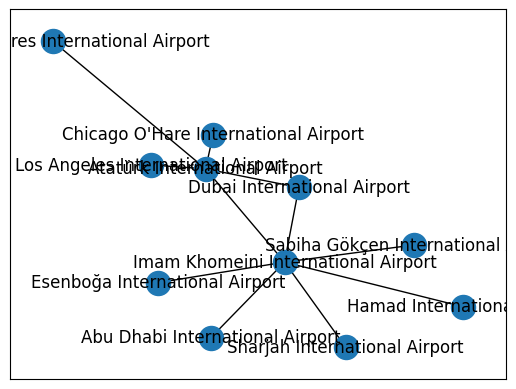

In [50]:
nx.draw_networkx(Geographical_map)


In [51]:
source_airport_set = set(df2['SourceAirport'])
destination_airport_set = set(df2['DestinationAirport'])

In [52]:
destination_airport_set.update(source_airport_set)

In [53]:
destination_airport_set

{'Abu Dhabi International Airport',
 'Adnan Menderes International Airport',
 'Atatürk International Airport',
 "Chicago O'Hare International Airport",
 'Dubai International Airport',
 'Esenboğa International Airport',
 'Hamad International Airport',
 'Imam Khomeini International Airport',
 'Los Angeles International Airport',
 'Sabiha Gökçen International Airport',
 'Sharjah International Airport'}

In [54]:
 for i in range(0, len(destination_airport_set)):
    d = dict.fromkeys(destination_airport_set,i)

In [55]:
nodes = list(destination_airport_set)

In [56]:
nodes

['Adnan Menderes International Airport',
 'Esenboğa International Airport',
 'Atatürk International Airport',
 "Chicago O'Hare International Airport",
 'Sharjah International Airport',
 'Imam Khomeini International Airport',
 'Hamad International Airport',
 'Abu Dhabi International Airport',
 'Dubai International Airport',
 'Sabiha Gökçen International Airport',
 'Los Angeles International Airport']

In [57]:
parameter = []

In [58]:
min_items_list = list(df2.min())
max_items_list = list(df2.max())

In [59]:
for i in range(len(distance_dict)):
    distance_dict[i] = (distance_dict[i] - min_items_list[13]) / (max_items_list[13] - min_items_list[13])
    SourceAirport_Latitude_dict[i] = (SourceAirport_Latitude_dict[i] - min_items_list[5]) / (max_items_list[5] - min_items_list[5])
    SourceAirport_Altitude_dict[i] = (SourceAirport_Altitude_dict[i] - min_items_list[7]) / (max_items_list[7] - min_items_list[7])
    SourceAirport_Longitude_dict[i] = (SourceAirport_Longitude_dict[i] - min_items_list[6]) / (max_items_list[6] - min_items_list[6])
    DestinationAirport_Latitude_dict[i] = (DestinationAirport_Latitude_dict[i] - min_items_list[10]) / (max_items_list[10] - min_items_list[10])
    DestinationAirport_Altitude_dict[i] = (DestinationAirport_Altitude_dict[i] - min_items_list[12]) / (max_items_list[12] - min_items_list[12])
    DestinationAirport_Longitude_dict[i] = (DestinationAirport_Longitude_dict[i] - min_items_list[11]) / (max_items_list[11] - min_items_list[11])
    FlyTime_dict[i] = (FlyTime_dict[i] - min_items_list[14]) / (max_items_list[14] - min_items_list[14])
    Price_dict[i] = (Price_dict[i] - min_items_list[15]) / (max_items_list[15] - min_items_list[15])    

In [60]:
for i in DestinationAirport_Longitude_dict:
    golabi = math.sqrt((math.pow(DestinationAirport_Latitude_dict[i] - SourceAirport_Latitude_dict[i], 2)) + 
    (math.pow(DestinationAirport_Altitude_dict[i] - SourceAirport_Altitude_dict[i], 2)) +
    (math.pow(DestinationAirport_Longitude_dict[i] - SourceAirport_Longitude_dict[i], 2)))

    parameter.append(golabi + FlyTime_dict[i] + Price_dict[i] + distance_dict[i])

In [61]:
init_graph = {}
for node in nodes:
    init_graph[node] = {}

for i in source_airport_dict:
    init_graph[source_airport_dict[i]][destination_airport_dict[i]] = parameter[i]

In [62]:
init_graph

{'Adnan Menderes International Airport': {'Atatürk International Airport': 0.8723797976429114},
 'Esenboğa International Airport': {'Imam Khomeini International Airport': 1.280997558387353},
 'Atatürk International Airport': {'Imam Khomeini International Airport': 1.8279460532127711},
 "Chicago O'Hare International Airport": {'Atatürk International Airport': 2.652658792939853},
 'Sharjah International Airport': {'Imam Khomeini International Airport': 1.2126807119780514},
 'Imam Khomeini International Airport': {},
 'Hamad International Airport': {'Imam Khomeini International Airport': 1.2251094456392597},
 'Abu Dhabi International Airport': {'Imam Khomeini International Airport': 1.2382974800420417},
 'Dubai International Airport': {'Imam Khomeini International Airport': 1.2290208460577676,
  'Atatürk International Airport': 2.1315611856831636},
 'Sabiha Gökçen International Airport': {'Imam Khomeini International Airport': 1.7791708912338189},
 'Los Angeles International Airport': {'A

In [63]:
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = init_graph
    
    def get_nodes(self):
        "Returns the nodes of the graph."
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Returns the neighbors of a node."
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Returns the value of an edge between two nodes."
        return self.graph[node1][node2]

In [64]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
   
    shortest_path = {}
    
    previous_nodes = {}
    
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value  
    shortest_path[start_node] = 0
    
    while unvisited_nodes:
        current_min_node = None
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                previous_nodes[neighbor] = current_min_node
 
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

In [65]:
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    path.append(start_node)
    
    print("We found the following best path with a value of {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

In [66]:
graph = Graph(nodes, init_graph)
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="Los Angeles International Airport")
print_result(previous_nodes, shortest_path, start_node="Los Angeles International Airport", target_node="Imam Khomeini International Airport")

We found the following best path with a value of 5.287370097469818.
Los Angeles International Airport -> Atatürk International Airport -> Imam Khomeini International Airport
